In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
sns.set(color_codes=True)
%matplotlib inline

In [2]:
filename = './data/spam.csv'
df = pd.read_csv(filename, encoding='latin-1')
df.columns = ['label', 'text', 'v3', 'v4', 'v5']

In [3]:
df.head(10)

,label,text,v3,v4,v5
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
df = df.drop(['v3','v4','v5'],axis=1)

In [5]:
df.head(5)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df['length'] = df['text'].apply(len)
df.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


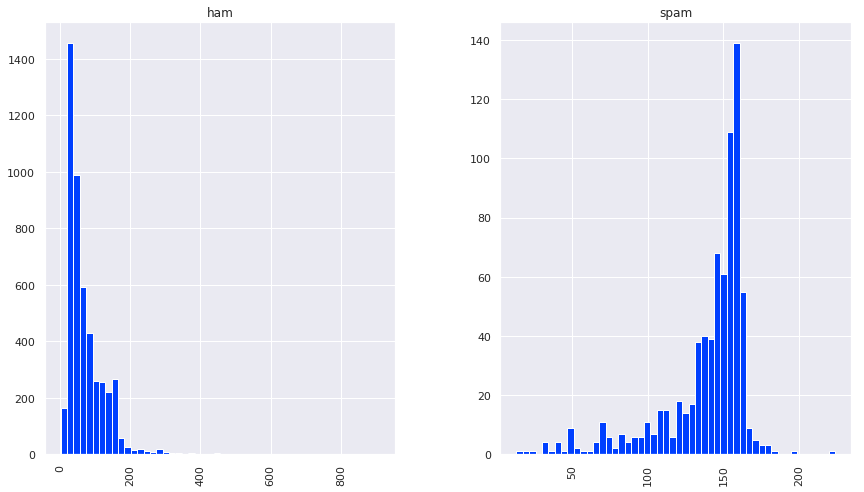

In [7]:
plt.style.use('seaborn-bright')
df.hist(column='length', by='label', bins=50,figsize=(14,8))
plt.show()

In [8]:
text_feat = df['text'].copy()

In [9]:
def text_process(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)

In [10]:
text_feat = text_feat.apply(text_process)

In [11]:
vectorizer = TfidfVectorizer("english")
features = vectorizer.fit_transform(text_feat)

In [12]:
features_train, features_test, labels_train, labels_test = train_test_split(features, df['label'], test_size=0.3, random_state=111)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [14]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

In [15]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}



In [16]:
mnb.fit(features_train, labels_train)

MultinomialNB(alpha=0.2, class_prior=None, fit_prior=True)

In [17]:
mnb.coef_

array([[-9.85366748, -9.01566321, -8.83669322, ..., -9.85366748,
        -9.85366748, -9.85366748]])

In [18]:
mnb.intercept_

array([-2.02456493])

In [19]:
def train_classifier(clf, feature_train, labels_train):    
    clf.fit(feature_train, labels_train)

In [20]:
def predict_labels(clf, features):
    return (clf.predict(features))

In [21]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

In [22]:
df_scores = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df_scores

/home/ineersa/PycharmProjects/iris/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


,Score
SVC,0.978469
KN,0.924641
NB,0.984450
DT,0.958732
LR,0.943182
RF,0.970096
AdaBoost,0.967105
BgC,0.967105
ETC,0.977273


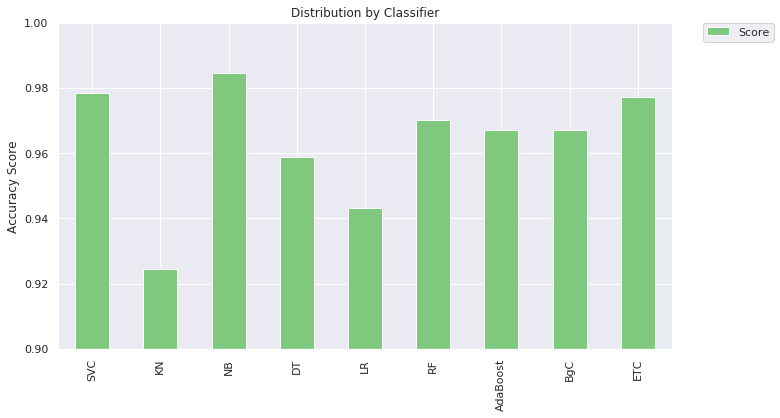

In [41]:
df_scores.plot(kind='bar', ylim=(0.9,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df_scores.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [207]:
from nltk.corpus import stopwords
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split())# if word not in STOPWORDS) # delete stopwors from text
    return text
    
text_feat = df['text'].copy()
text_feat = text_feat.apply(clean_text)

In [212]:
def get_wordnet_pos( tag):
    """
    return WORDNET POS compliance to WORDNET lemmatization (a,n,r,v)
    """
    if tag.startswith('J'):
        return nltk.corpus.reader.wordnet.ADJ
    elif tag.startswith('V'):
        return nltk.corpus.reader.wordnet.VERB
    elif tag.startswith('N'):
        return nltk.corpus.reader.wordnet.NOUN
    elif tag.startswith('R'):
        return nltk.corpus.reader.wordnet.ADV
    else:
        # As default pos in lemmatization is Noun
        return nltk.corpus.reader.wordnet.NOUN

In [213]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re
from nltk import TweetTokenizer
from nltk import pos_tag
import nltk

def label_sentences(corpus=None, label_type=None):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []
    tknzr = TweetTokenizer()
    lemma = nltk.wordnet.WordNetLemmatizer()
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        tokens = tknzr.tokenize(text=v)
        pos_tags = pos_tag(tokens)
        lemmas = []
        for (word, pos) in pos_tags:
            lemmas.append(lemma.lemmatize(word, get_wordnet_pos(pos)))

        labeled.append(TaggedDocument(lemmas, [label]))
    return labeled
X_train, X_test, y_train, y_test = train_test_split(text_feat, df['label'], test_size=0.3, random_state=111)
X_train = label_sentences(corpus=X_train, label_type='Train')
X_test = label_sentences(corpus=X_test, label_type='Test')
all_data = X_train + X_test

In [217]:
model_dbow = Doc2Vec(dm=0, vector_size=100, negative=5, min_count=1, epochs=100, alpha=0.025, min_alpha=0.00025, window=2)
model_dbow.build_vocab([x for x in tqdm(all_data)])

model_dbow.train(all_data, total_examples=len(all_data), epochs=model_dbow.epochs)

100%|██████████| 5572/5572 [00:00<00:00, 3544768.98it/s]


In [192]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
        
    return vectors

In [218]:
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 100, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 100, 'Test')

In [219]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(train_vectors_dbow, y_train)
logreg = logreg.fit(train_vectors_dbow, y_train)
y_pred = logreg.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.9844497607655502


In [220]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[ 219   13]
 [  13 1427]]
Normalized confusion matrix
[[0.94 0.06]
 [0.01 0.99]]


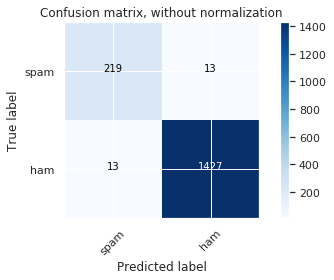

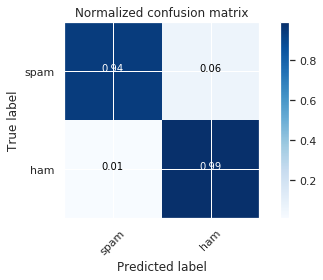

In [221]:
class_names=['spam', 'ham']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, class_names)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [69]:
model_dmm = Doc2Vec(dm=1, vector_size=100, negative=5, min_count=1, epochs=50, alpha=0.025, min_alpha=0.00025, window=2)
model_dmm.build_vocab([x for x in tqdm(all_data)])

model_dmm.train(all_data, total_examples=len(all_data), epochs=model_dbow.epochs)

100%|██████████| 5572/5572 [00:00<00:00, 3075896.54it/s]


In [70]:
train_vectors_dmm = get_vectors(model_dmm, len(X_train), 100, 'Train')
test_vectors_dmm = get_vectors(model_dmm, len(X_test), 100, 'Test')

In [71]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(train_vectors_dmm, y_train)
logreg = logreg.fit(train_vectors_dmm, y_train)
y_pred = logreg.predict(test_vectors_dmm)
print('accuracy %s' % accuracy_score(y_pred, y_test))

/home/ineersa/PycharmProjects/iris/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ineersa/PycharmProjects/iris/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy 0.9766816143497757


In [73]:
from gensim.test.test_doc2vec import ConcatenatedDoc2Vec
doc2vec_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])

In [77]:
train_vectors_d2v = get_vectors(doc2vec_model, len(X_train), 200, 'Train')
test_vectors_d2v = get_vectors(doc2vec_model, len(X_test), 200, 'Test')

In [137]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(train_vectors_d2v, y_train)
logreg = logreg.fit(train_vectors_d2v, y_train)
y_pred = logreg.predict(test_vectors_d2v)
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.967713004484305


In [129]:
#model_dbow.save('best_09892_dbow_e100_w1')

In [139]:
epochs = range(30, 100, 5)
windows = range(1, 5)
vec_sizes = range(50, 150, 10)

In [134]:
import warnings
warnings.filterwarnings('ignore')  # Let's not pay heed to them right now

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [172]:
def train_dbow_model(all_data=None, epochs=None, windows=None, vec_sizes=None):
    result = []
    for epoch in epochs:
        for window in windows:
            for vec_size in vec_sizes:
                for i in range(1,3):
                    model_dbow = Doc2Vec(dm=0, vector_size=vec_size, negative=5, min_count=1, epochs=epoch, alpha=0.025, min_alpha=0.00025, window=window)
                    model_dbow.build_vocab([x for x in tqdm(all_data)])

                    model_dbow.train(all_data, total_examples=len(all_data), epochs=model_dbow.epochs)
                    train_vectors_dbow = get_vectors(model_dbow, len(X_train), vec_size, 'Train')
                    test_vectors_dbow = get_vectors(model_dbow, len(X_test), vec_size, 'Test')
                    logreg = LogisticRegression(n_jobs=1, C=1e5)
                    logreg.fit(train_vectors_d2v, y_train)
                    logreg = logreg.fit(train_vectors_d2v, y_train)
                    y_pred = logreg.predict(test_vectors_d2v)
                    result.append(
                        accuracy_score(y_pred, y_test))

In [169]:
lf = df['length'].as_matrix()
newfeat = np.hstack((features.todense(),lf[:, None]))

In [170]:
features_train, features_test, labels_train, labels_test = train_test_split(newfeat, df['label'], test_size=0.3, random_state=111)

In [171]:
logreg = logreg.fit(features_train, labels_train)
y_pred = logreg.predict(features_test)
print('accuracy %s' % accuracy_score(y_pred, labels_test))

accuracy 0.9874439461883409
